# Importing all the libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading the Data Set

In [6]:
df= pd.read_csv('ETH_1H.csv')
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


# Data Preprocessing and Logic Implementation.

In [7]:
projection = 14    # variable for number of days to predict for future.
# create a new column named prediction 

df['Prediction'] = df [['Close']].shift(-projection)
df.head(20)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Prediction
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,157.69
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,159.05
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,158.77
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,159.84
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,160.21
5,1586977200000,2020-04-15 19:00:00,ETHUSD,157.78,157.84,157.10,157.10,329.356201,160.91
6,1586973600000,2020-04-15 18:00:00,ETHUSD,157.48,158.20,157.48,157.78,520.137463,159.97
7,1586970000000,2020-04-15 17:00:00,ETHUSD,157.12,157.78,156.90,157.48,156.552221,160.62
8,1586966400000,2020-04-15 16:00:00,ETHUSD,155.81,157.52,155.74,157.12,430.083035,160.27
9,1586962800000,2020-04-15 15:00:00,ETHUSD,157.12,157.15,155.81,155.81,303.839541,158.50


In [8]:
df.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Prediction
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,NaN
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,NaN
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,NaN
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,NaN
34496,1462798800,2016-05-09 13:00:00,ETHUSD,0.00,12.00,0.00,9.55,432.562115,NaN


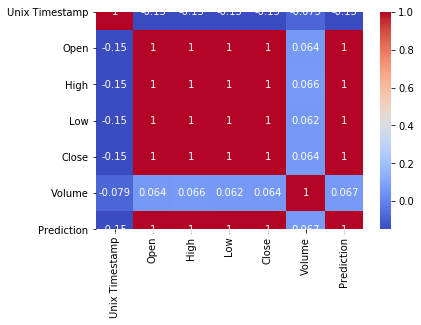

In [9]:
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm')

In [10]:
#create independent dataset (x)
x = np.array(df[['Close']]) 
x=x[:-projection]
print(x)

[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.36]
 [  9.36]
 [  9.36]]


In [11]:
y= df['Prediction'].values
y= y[:-projection]
print(y)

[157.69 159.05 158.77 ...   9.99  10.     9.55]


# Splitting and visualizing Data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20)

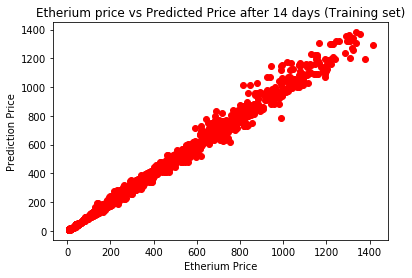

In [13]:
plt.scatter(x_test, y_test, color = "red")
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")
plt.xlabel("Etherium Price")
plt.ylabel("Prediction Price")
plt.show()

# Model Building & testing


## Linear regression

     Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.



In [16]:
linReg = LinearRegression()
#train the model
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#test the model using score 
linReg_confidense = linReg.score(x_test, y_test)
print("Linear regression confidence :", linReg_confidense)

Linear regression confidence : 0.9951208537810732


In [18]:
linReg_prediction = linReg.predict(x_test)
print(linReg_prediction)

[455.40005732 209.8469129  183.75732746 ... 127.84964877  12.01667467
  11.18922507]


In [19]:
y_test


array([467.69, 230.36, 186.14, ..., 128.24,  11.54,  10.77])

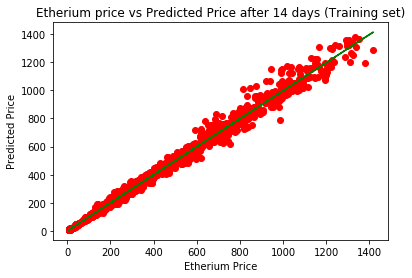

In [20]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, linReg.predict(x_train), color = "green")
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")
plt.xlabel("Etherium Price")
plt.ylabel("Predicted Price")
plt.show()

# Saving Model & Loading Model


In [21]:
import pickle
# save the model to disk
filename = 'ether_predictor.pkl'
pickle.dump(linReg, open(filename, 'wb'))

In [22]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9951208537810732


In [23]:
loaded_model.predict(x_test)

array([455.40005732, 209.8469129 , 183.75732746, ..., 127.84964877,
        12.01667467,  11.18922507])

# THANK YOU !!!